# **Heart Failure Prediction using Supervised ML approach**
### **INTRODUCTION**
#### **Objectives**
The objective of this project is to use Machine learning to predict Heart Failure of a patient.

#### **About Dataset**
This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features. 

**Data Source:** http://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

**Attribute Information:**
Thirteen (13) clinical features:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

### Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 1.3)
%matplotlib inline

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## **Exploratory Data Analysis**
> Here we would explore the dataset for insights and also check if the dataset requires cleaning.

### Visualizing Numerical Columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


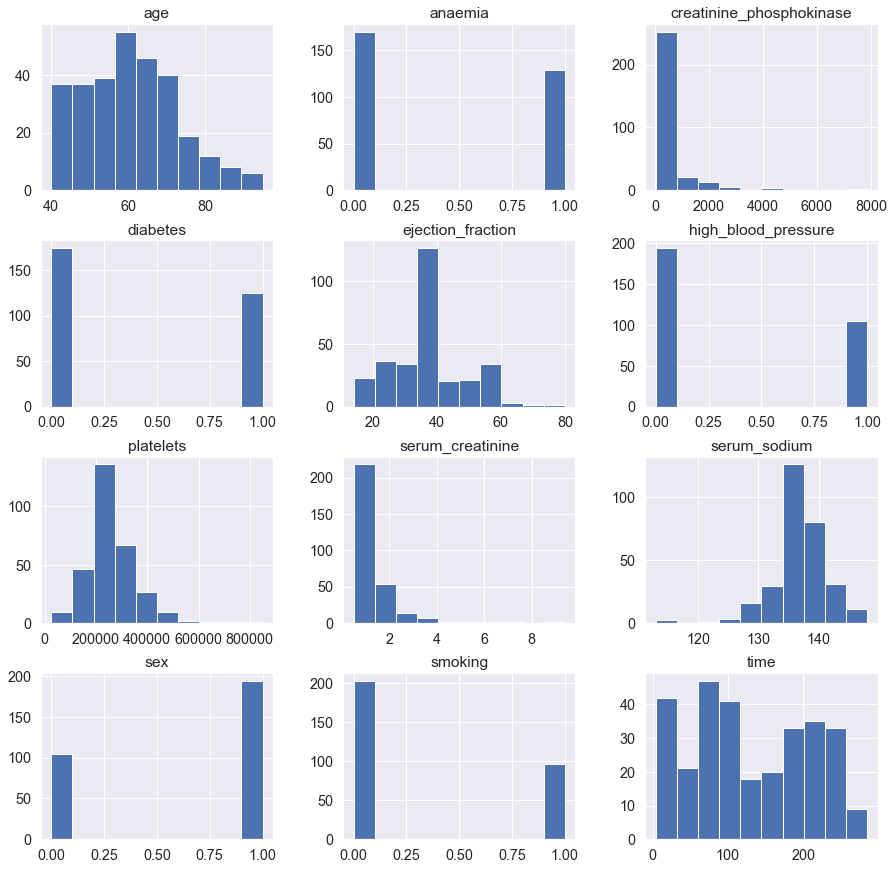

In [5]:
sns.set(font_scale = 1.3)
df.drop('DEATH_EVENT', axis=1).hist(figsize = (15, 15));

**RESULTS:**
> The dataset is clean, with all features in the right datatype, no null values etc.

**SOME INSIGHT:**
- `creatinine_phosphokinase:` Although majority of the people have lower values(less than 500), extremely high values (over 500 with few apprroaching 8000) are also present.
- `age:` People are between the age of 40 to 95
- `serum sodium:` Majority of people have values of 130 to 140, with possible outliner having values less than 120.

### Checking for Data Imbalance

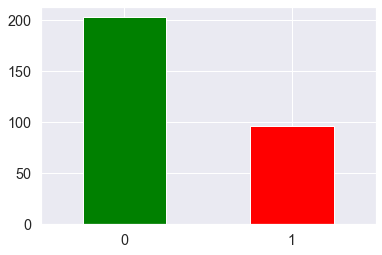

In [6]:
df['DEATH_EVENT'].value_counts().plot.bar(color=['green', 'red']);
plt.xticks(rotation=0);

**INSIGHT:** The dataset is not very imbalanced and can be considered as an ordinary binary classification task

## Model Building
##### Import necessary libraries

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, \
confusion_matrix, roc_auc_score

In [8]:
rs = 123

##### Split the data into features(X) and Target(Y)

In [9]:
X = df.loc[ : , df.columns != 'DEATH_EVENT']
y = df['DEATH_EVENT']

##### Split the data into Training and Testing set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

#### Define Grid Search for models

In [11]:
rs = 123
# Grid search hyperparameters for a Logistic Regression model
def grid_search_lr(X_train, y_train):
    params_grid = {
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
    }
    lr_model = LogisticRegression(random_state=rs, max_iter=1000)
    grid_search = GridSearchCV(estimator = lr_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grid search hyperparameters for a Random Forest model
def grid_search_rf(X_train, y_train):
    params_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [25, 50, 100],
    'min_samples_split': [2, 5],
    'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}]
    }
    rf_model = RandomForestClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grid search hyperparameters for a Extra Trees model
def grid_search_ext(X_train, y_train):
    params_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [25, 50, 100],
    'min_samples_split': [2, 5],
    'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}]
    }
    ext_model = ExtraTreesClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = ext_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grid search hyperparameters for a Support Vector Classifier(SVC) model
def grid_search_svc(X_train, y_train):
    params_grid = {
    'gamma': [0.5, 1, 2, 5, 8, 10],
    'C': [1, 5, 10, 20],
    'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}]
    }
    svc_model = SVC(random_state=rs)
    grid_search = GridSearchCV(estimator = svc_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grid search hyperparameters for a AdaBoost Classifier model
def grid_search_adaB(X_train, y_train):
    params_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
                  'n_estimators' : [2*n+1 for n in range(10)],
                  'algorithm':['SAMME', 'SAMME.R']} 
    ada_model = AdaBoostClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = ada_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grid search hyperparameters for a XGB Classifier model
def grid_search_xgb(X_train, y_train):
    params_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
                   'n_estimators' : [2*n+1 for n in range(10)],
                   'gamma': [0.5, 1, 2, 5, 8, 10]} 
    xgb_model = XGBClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = xgb_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

In [12]:
# Define evaluation
def evaluate(y_test, y_pred, title):
    # Calculate the precision, recall, f5 given the y_test and predictions
    # Note that we use beta=5 which means we think the cost of positive class is 5 times of negative class
    # You could try other beta values yourself
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred, beta=5, pos_label=1, average='binary')
    auc = roc_auc_score(y_test, y_pred)

    # Store results to dictionary
    result = {}
    result['accuracy'] = round(accuracy, 4)
    result['precision'] = round(precision, 4)
    result['recall'] = round(recall, 4)
    result['fscore'] = round(fbeta, 4)
    result['auc'] = round(auc, 4)

    # Plotting confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, fmt='d')
    plt.yticks(rotation=0);
    plt.title(title);
    
    return result

### Logistic Regression
##### Normal Logistic regression

{'accuracy': 0.8667,
 'precision': 0.9231,
 'recall': 0.6316,
 'fscore': 0.6393,
 'auc': 0.8036}

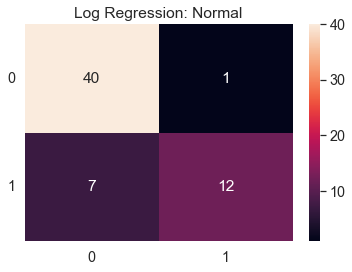

In [13]:
# Define a logistic regression with weight
lr = LogisticRegression(random_state=rs, max_iter = 1000)

# Train the model
lr.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = lr.predict(X_test)

lr_res = evaluate(y_test, y_pred, 'Log Regression: Normal')
lr_res

##### Class Reweighting (Optimized Logistic Regression)
> Here we fine-tune Hyperparameters using grid_search to give a better F1 score.

In [14]:
# Applying Grid Serch
best_param = grid_search_lr(X_train, y_train)
class_weight = best_param['class_weight']

Fitting 5 folds for each of 3 candidates, totalling 15 fits


{'accuracy': 0.7833,
 'precision': 0.6071,
 'recall': 0.8947,
 'fscore': 0.8787,
 'auc': 0.8132}

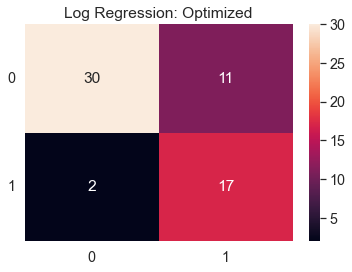

In [15]:
# Define a logistic regression with weight
lr = LogisticRegression(random_state=rs, class_weight = class_weight,
                              max_iter = 1000)

# Train the model
lr.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = lr.predict(X_test)

lr_optimized = evaluate(y_test, y_pred, 'Log Regression: Optimized')
lr_optimized

### Random Forest Classifier

##### Normal Random Forest

{'accuracy': 0.9167,
 'precision': 0.8889,
 'recall': 0.8421,
 'fscore': 0.8438,
 'auc': 0.8967}

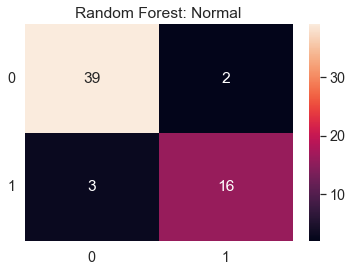

In [16]:
# Define a logistic regression with weight
rf = RandomForestClassifier(random_state=rs)

# Train the model
rf.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = rf.predict(X_test)

rf_res = evaluate(y_test, y_pred, 'Random Forest: Normal')
rf_res

##### Optimized Random Forest: Class Reweighting
> Here we fine-tune Hyperparameters using grid_search to give a better F1 score.

In [17]:
best_param = grid_search_rf(X_train, y_train)
class_weight = best_param['class_weight']
max_depth = best_param['max_depth']
min_samples_split = best_param['min_samples_split']
n_estimators = best_param['n_estimators']

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'accuracy': 0.8833,
 'precision': 0.7727,
 'recall': 0.8947,
 'fscore': 0.8893,
 'auc': 0.8864}

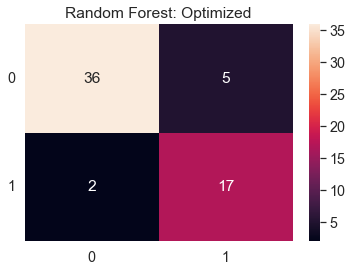

In [18]:
# Define a Random Forest with weight
rf = RandomForestClassifier(random_state=rs, class_weight=class_weight,
                           max_depth=max_depth, min_samples_split=min_samples_split,
                           n_estimators=n_estimators)

# Train the model
rf.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = rf.predict(X_test)

rf_optimized = evaluate(y_test, y_pred, 'Random Forest: Optimized')
rf_optimized

### Extra Trees Classifier

##### Normal Extra Trees

{'accuracy': 0.85,
 'precision': 0.8571,
 'recall': 0.6316,
 'fscore': 0.638,
 'auc': 0.7914}

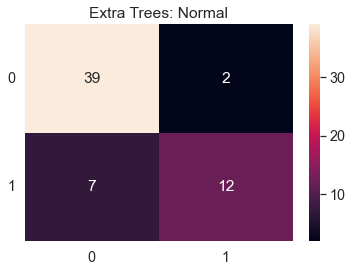

In [19]:
# Define ExtraTrees with weight
ext = ExtraTreesClassifier(random_state = rs)

# Train the model
ext.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = ext.predict(X_test)

ext_res = evaluate(y_test, y_pred, 'Extra Trees: Normal')
ext_res

##### Extra Trees Optimized: Class Reweighting
> Here we fine-tune Hyperparameters using grid_search to give a better F1 score.

In [20]:
best_param = grid_search_ext(X_train, y_train)
class_weight = best_param['class_weight']
max_depth = best_param['max_depth']
min_samples_split = best_param['min_samples_split']
n_estimators = best_param['n_estimators']

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'accuracy': 0.8667,
 'precision': 0.7895,
 'recall': 0.7895,
 'fscore': 0.7895,
 'auc': 0.846}

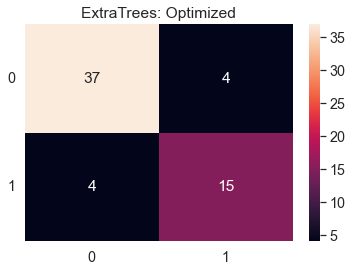

In [21]:
# Define a EXtra Tree with weight
ext = ExtraTreesClassifier(random_state=rs, class_weight=class_weight,
                           max_depth=max_depth, min_samples_split=min_samples_split,
                           n_estimators=n_estimators)

# Train the model
ext.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = ext.predict(X_test)

ext_optimized = evaluate(y_test, y_pred, 'ExtraTrees: Optimized')
ext_optimized

### Support Vector Classifier (SVC)

##### Normal SVC

In [22]:
# Scaling Data
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
# Split scaled data
Xsc_train, Xsc_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, stratify=y, random_state = rs)

{'accuracy': 0.75,
 'precision': 0.7,
 'recall': 0.3684,
 'fscore': 0.3753,
 'auc': 0.6476}

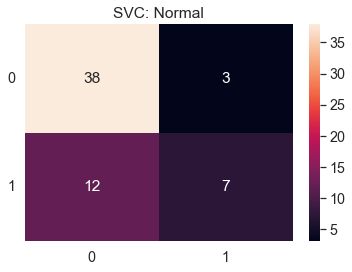

In [23]:
# Define Support Vector Classifier with weight
svc = SVC(random_state = rs)

# Train the model
svc.fit(Xsc_train, y_train)
# Make predictions on the test dataset
y_pred = svc.predict(Xsc_test)

svc_res = evaluate(y_test, y_pred, 'SVC: Normal')
svc_res

##### Optimized SVC: Class Reweighting
> Here we fine-tune Hyperparameters using grid_search to give a better F1 score.

In [24]:
best_param = grid_search_svc(Xsc_train, y_train)
class_weight = best_param['class_weight']
gamma = best_param['gamma']
C = best_param['C']

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'accuracy': 0.7167,
 'precision': 0.5357,
 'recall': 0.7895,
 'fscore': 0.7753,
 'auc': 0.7362}

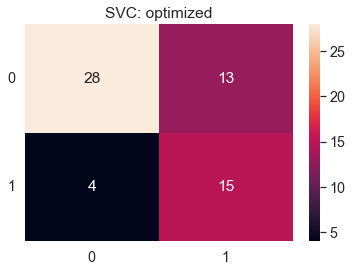

In [25]:
# Define SVC with weight
svc = SVC(random_state = rs,
          class_weight=class_weight,
          C=C, gamma=gamma)

# Train the model
svc.fit(Xsc_train, y_train)
# Make predictions on the test dataset
y_pred = svc.predict(Xsc_test)

svc_optimized = evaluate(y_test, y_pred, 'SVC: optimized')
svc_optimized

### AdaBoost Classifier
##### Normal AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

{'accuracy': 0.85,
 'precision': 0.7778,
 'recall': 0.7368,
 'fscore': 0.7383,
 'auc': 0.8196}

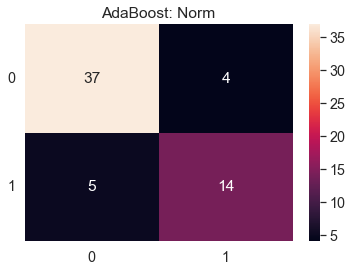

In [27]:
# Define Classifier
adab = AdaBoostClassifier(random_state=rs)

# Train Classifier
adab.fit(X_train, y_train)
# Make Predictions
y_pred = adab.predict(X_test)
# Evaluate model
ada_res = evaluate(y_test, y_pred, 'AdaBoost: Norm')
ada_res

##### Optimized AdaBoost
> Here we fine-tune Hyperparameters using grid_search to give a better F1 score.

In [28]:
best_param = grid_search_adaB(X_train, y_train)
learning_rate = best_param['learning_rate']
n_estimators = best_param['n_estimators']
algorithm = best_param['algorithm']

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'accuracy': 0.9167,
 'precision': 0.9375,
 'recall': 0.7895,
 'fscore': 0.7943,
 'auc': 0.8825}

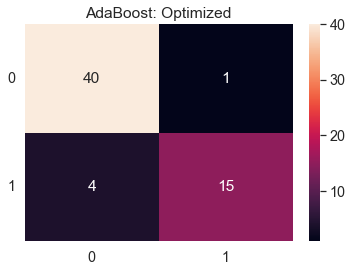

In [29]:
# Define a AdaBoost Classifier Grid searched
adab = AdaBoostClassifier(random_state=rs,
                         learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         algorithm=algorithm)

# Train the model
adab.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = adab.predict(X_test)

ada_optimized = evaluate(y_test, y_pred, 'AdaBoost: Optimized')
ada_optimized

### XGBoost Classifier
##### Normal AdaBoost

{'accuracy': 0.8667,
 'precision': 0.8667,
 'recall': 0.6842,
 'fscore': 0.6898,
 'auc': 0.8177}

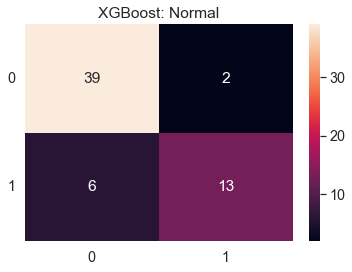

In [30]:
# Instantiate model
xgb = XGBClassifier(random_state = rs)

# Fit on training set
xgb.fit(X_train, y_train)

# Make Predict
y_pred = xgb.predict(X_test)

xgb_res = evaluate(y_test, y_pred, 'XGBoost: Normal')
xgb_res

##### Optimal XGBoost
> Here we fine-tune Hyperparameters using grid_search to give a better F1 score.

In [31]:
best_param = grid_search_xgb(X_train, y_train)
learning_rate = best_param['learning_rate']
n_estimators = best_param['n_estimators']
gamma = best_param['gamma']

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


{'accuracy': 0.9,
 'precision': 0.8824,
 'recall': 0.7895,
 'fscore': 0.7927,
 'auc': 0.8703}

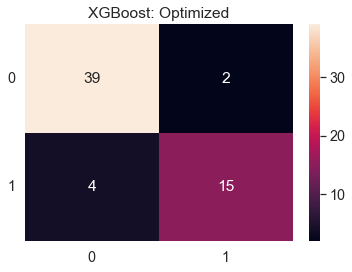

In [39]:
# Define a XGB Classifier Grid searched
xgb = XGBClassifier(random_state=rs,
                         learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         gamma=gamma)

# Train the model
xgb.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = xgb.predict(X_test)

xgb_optimized = evaluate(y_test, y_pred, 'XGBoost: Optimized')
xgb_optimized

### Voting Classifier

In [33]:
from sklearn.ensemble import VotingClassifier
estimator = [('RandomForest', rf), ('AdaBoost', adab)]

{'accuracy': 0.9,
 'precision': 0.8095,
 'recall': 0.8947,
 'fscore': 0.8911,
 'auc': 0.8986}

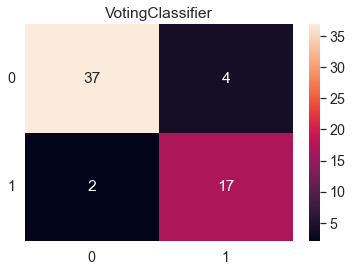

In [34]:
vc = VotingClassifier(estimator, voting='soft')
vc= vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

vc_res = evaluate(y_test, y_pred, 'VotingClassifier')
vc_res

## Final Result


In [35]:
list = [lr_optimized.values(), rf_optimized.values(), ext_optimized.values(), svc_optimized.values(), 
ada_optimized.values(), xgb_optimized.values(), vc_res.values()]

In [36]:
columns = xgb_optimized.keys()

In [37]:
index = ['LogReg', 'RandomForest', 'ExtraTrees', 'SVC', 
         'AdaBoost', 'XGBoost', 'VotingCLF']

In [38]:
df = pd.DataFrame(list, columns =columns, index=index)
df.sort_values(by='fscore', ascending=False)

,accuracy,precision,recall,fscore,auc
VotingCLF,0.9000,0.8095,0.8947,0.8911,0.8986
RandomForest,0.8833,0.7727,0.8947,0.8893,0.8864
LogReg,0.7833,0.6071,0.8947,0.8787,0.8132
AdaBoost,0.9167,0.9375,0.7895,0.7943,0.8825
XGBoost,0.9000,0.8824,0.7895,0.7927,0.8703
ExtraTrees,0.8667,0.7895,0.7895,0.7895,0.8460
SVC,0.7167,0.5357,0.7895,0.7753,0.7362


From the above, It is clear that the **`Voting Classifier`** is the Best Choice for predicting Heart Failure.
- **Fscore:** 0.89
- **Precision:** 0.81
- **Recall:** 0.89
- **Accuracy:** 0.90